In [176]:
from google.colab import files
uploaded = files.upload()

In [177]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
df = pd.read_csv('./train.csv')
df.tail(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


                                            Loan_Status
Credit_History Education    Gender Married             
0.0            Graduate     Female No          0.090909
                                   Yes         0.000000
                            Male   No          0.133333
                                   Yes         0.093750
               Not Graduate Female No          0.000000
                                   Yes         0.000000
                            Male   No          0.000000
                                   Yes         0.055556
1.0            Graduate     Female No          0.729167
                                   Yes         0.800000
                            Male   No          0.737500
                                   Yes         0.850000
               Not Graduate Female No          0.750000
                                   Yes         1.000000
                            Male   No          0.708333
                                   Yes         0

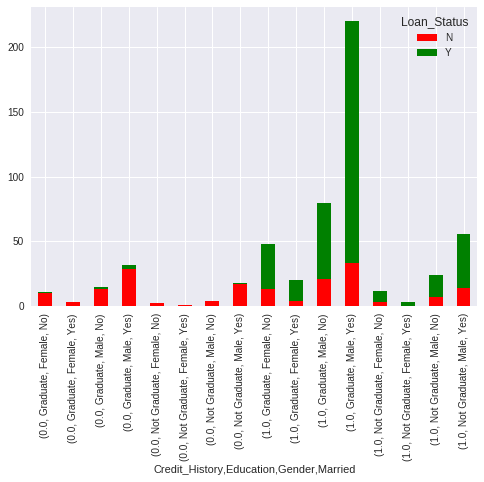

In [178]:
df.describe()
#probability of getting loab by various factors
prob_loan = df.pivot_table(values = 'Loan_Status',index = ['Credit_History','Education','Gender','Married'],aggfunc = lambda x:x.map({'Y':1,'N':0}).mean())
print(prob_loan)
tmp = pd.crosstab([df['Credit_History'],df['Education'],df['Gender'],df['Married']],df['Loan_Status'])
tmp.plot(kind = 'bar',stacked = True, color = ['red','green'] )

In [179]:
#missing values
df.apply(lambda x: sum(x.isnull()),axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
#df.apply(lambda x: sum(x.isnull()),axis = 0)

In [181]:
#categorical variables
from sklearn.preprocessing import LabelEncoder

features = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
label_e = LabelEncoder()
for feature in features:
  df[feature] = label_e.fit_transform(df[feature])

df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [0]:
from sklearn import model_selection 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X = df.iloc[:,1:12]
Y = df.iloc[:,12]
X = X.iloc[:,7:]
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size = 0.4,random_state = 2)


In [183]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='linear')
kfold = model_selection.KFold(n_splits=5, random_state=2)
s = model_selection.cross_val_score(svm,x_train,y_train,cv=kfold, scoring = 'accuracy')
print("SVM Cross validation",s.mean())

svm.fit(x_train,y_train)
pred = svm.predict(x_test)
print("SVM Accuracy",accuracy_score(y_test,pred))


#random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 150,min_samples_split=25, max_depth=10,max_features = 2,random_state = 2)

kfold = model_selection.KFold(n_splits=5, random_state=2)
rf = model_selection.cross_val_score(random_forest,x_train,y_train,cv=kfold, scoring = 'accuracy')
print("Random Forest Cross validation",rf.mean())

random_forest.fit(x_train,y_train)
pred = random_forest.predict(x_test)
print("Random Forest Accuracy",accuracy_score(y_test,pred))

loan_amt,loan_amt_term,credit_history,property_area = 158.000000,360.0,0.0,1	
sample_pred = random_forest.predict([[loan_amt,loan_amt_term,credit_history,property_area]])
print("\nSample Prediction\n")
print("Amount={} Amount Term={} Credit Score={} Property area={}".format(loan_amt,loan_amt_term,credit_history,property_area))
print ("Loan Approved?","yes" if sample_pred else "No")

('SVM Cross validation', 0.8231395779340985)
('SVM Accuracy', 0.7886178861788617)
('Random Forest Cross validation', 0.8068863383931877)
('Random Forest Accuracy', 0.7764227642276422)

Sample Prediction

Amount=158.0 Amount Term=360.0 Credit Score=0.0 Property area=1
('Loan Approved?', 'No')
